### Loading Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, tree, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

### Loading the Data

In [2]:
data = pd.read_csv(r'C:\Users\lenovo\Desktop\ExcelR\Assingments\Data Science\14. Decision Tree\Company_Data.csv')
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


### Converting Continuous Dataset to Categoriccal Dataset, and Label Encoding of the Target 

In [3]:
y = []
for i in range(0,400):
    if data.iloc[i,0]<=data['Sales'].median():
        y.append('Low')
    else:
        y.append('High')

data.iloc[:,0] = y
data['Sales'] = preprocessing.LabelEncoder().fit_transform(data['Sales'])
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0,138,73,11,276,120,Bad,42,17,Yes,Yes
1,0,111,48,16,260,83,Good,65,10,Yes,Yes
2,0,113,35,10,269,80,Medium,59,12,Yes,Yes
3,1,117,100,4,466,97,Medium,55,14,Yes,Yes
4,1,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,0,138,108,17,203,128,Good,33,14,Yes,Yes
396,1,139,23,3,37,120,Medium,55,11,No,Yes
397,1,162,26,12,368,159,Medium,40,18,Yes,Yes
398,1,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
# dataframe of the features and getting dummies for the categorical columns.
df = data.iloc[:,1:]
df = pd.get_dummies(df)
x = df

In [5]:
# Dataframe for target
y = data.iloc[:,0]

In [6]:
# spliting of the dataset into training and test dataset
# test_size = 0.15, means 15% of the data is kept as test data and rest 85% is kept as training data
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.15,random_state=40)

In [7]:
# Model Building
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 7)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

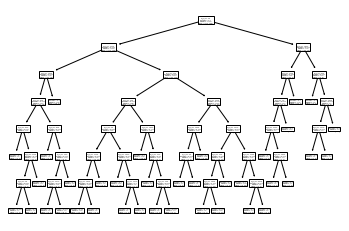

In [8]:
# Ploting the tree
tree.plot_tree(model);

In [9]:
fn = ['Competitor Price ($)','Income ($)','Advertising ($)','Population','Price ($)','Age','Education','ShelveLoc_Bad',\
      'ShelveLoc_Good','ShelveLoc_Medium','Urban_No','Urban_Yes','US_No','US_Yes']
cn = ['High','Low']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,10), dpi=1000)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [10]:
# Prediction by the model
pred = model.predict(x_test)
pred

array([1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1])

In [11]:
pd.Series(pred).value_counts()

0    33
1    27
dtype: int64

In [12]:
pd.crosstab(y_test,pred)

col_0,0,1
Sales,,
0,21,6
1,12,21


In [13]:
# Accuracy 
np.mean(pred==y_test)

0.7